# Жесткие системы ОДУ

Среди ОДУ есть особый класс задач называемых жесткими. Для таких задач свойственно наличие нескольких временных масштабов, когда одни процессы протекают сильно быстрее других. Попытки решить такие задачи явными методами Рунге-Кутты с использованием алгоритмов автоматического выбора шага приводили к следующим трудностям: для учета быстрых компонент выбирался очень маленький шаг, делая вычисления неэффективными и затратными по времени.

## Неявные методы Рунге-Кутты

Рассмотрим дифференциальные уравнения следующего вида:

$$
y^\prime = f(x, y).
$$

Такие уравнения можно решать с помощью неявных методов Рунге-Кутты, которые отличаются от явных тем, что требуют решения нелинейных систем уравнений на каждом шаге интегрирования. Благодаря этому они обеспечивают более высокую устойчивость, что делает их особенно полезными для решения жестких систем. Общий вид неявного $s$-стадийного метода Рунге-Кутты следующий:

$$
\begin{aligned}
& k_i = f \left( x_n + c_i h, y_n + h \sum_{j=1}^{s} a_{ij} k_j \right), \quad i=1,2,\ldots,s, \\
& y_{n+1} = y_n + h \sum_{i=1}^{s} b_i k_i.
\end{aligned}
$$

Коэффициенты $a_{ij}, b_i, c_i$ определяют устойчивость и порядок аппроксимации метода. Напомним, что в явных методах Рунге-Кутты матрица коэффициентов $a_{ij}$ обладает следующим свойством $a_{ij} = 0$ при $j \ge i$.

На эти коэффициенты можно наложить следующие условия:

- $ \sum_{j=1}^{s} a_{ij} = c_i$ -- необязательное условие Кутты, которое позволяет упростить вывод условий на порядок аппроксимации;
- $\sum_{i=1}^{s} b_i = 1$ -- необходимое условие первого порядка аппроксимации;
- $\sum_{i=1}^{s} b_i c_i = \frac{1}{2}$ -- необходимое условие второго порядка аппроксимации;
- $\sum_{i=1}^{s} b_i c_i^2 = \frac{1}{3} ,\; \sum_{i=1}^{s} b_i \sum_{j=1}^{s} a_{ij} c_j = \frac{1}{6} $ -- необходимые условия третьего порядка аппроксимации.

В общем случае для интегрирования системы из $n$ ОДУ на каждом шаге приходится решать $ns$ нелинейных уравнений. Количество вычислений можно сократить, если задать матрицу $a_{ij}$ нижнетреугольной, то есть $a_{ij} = 0$ при $j > i$. Методы, в основе которых лежит этот принцип, называются диагонально-неявными.

## Методы типа Розенброка

Среди методов, показывающих хорошие результаты при решении жестких задач, наиболее простыми в реализации являются методы типа Розенброка.

Применим диагонально-неявный метод Рунге-Кутта к автономному дифференциальному уравнению следующего вида:

$$
y^\prime = f(y);
$$

В результате возникнут следующие выражения:

$$
\begin{aligned}
& k_i = f \left(y_0 + h \sum_{j=1}^{i - 1} a_{ij} k_j + ha_{ii}k_i\right), \quad i=1,2,\ldots,s, \\
& y_{1} = y_0 + h \sum_{i=1}^{s} b_i k_i.
\end{aligned}
$$

Для упрощения $k_i$ умножим на $h$ и линеаризуя уравнение для этой величины получим:

$$
\begin{aligned}
& k_i = h f \left(y_0 +  \sum_{j=1}^{i - 1} a_{ij} k_j\right) + h f^\prime \left(y_0 +  \sum_{j=1}^{i - 1} a_{ij} k_j\right)a_{ii}k_i.
\end{aligned}
$$

Чтобы сократить количество вычислений, будем считать, что $f^\prime \left(y_0 +  \sum_{j=1}^{i - 1} a_{ij} k_j\right) \approx f^\prime (y_0)$. Обозначим эту величину за $J$. Также опыт показывает, что метод работает лучше, если $a_{ii}k_i$ заменить на линейную комбинацию $\sum_{j=1}^i \gamma_{ij} k_j$. Полученные таким образом методы принято называть $s$-стадийными методами Розенброка. Итоговое выражение для них принимает вид:

$$
\begin{aligned}
& k_i = h f \left(y_0 +  \sum_{j=1}^{i - 1} a_{ij} k_j\right) + h J \sum_{j=1}^i \gamma_{ij} k_j, \quad i=1,2,\ldots,s, \\
& y_{1} = y_0 + h \sum_{i=1}^{s} b_i k_i.
\end{aligned}
$$

Уравнение на $k_i$ можно записать следующим образом:

$$
\left( E - h J \gamma_{ii}\right)  k_i  = h f \left(y_0 +  \sum_{j=1}^{i - 1} a_{ij} k_j\right) + h J \sum_{j=1}^{i-1} \gamma_{ij} k_j.
$$

Тогда становится очевидным, что если выполнено соотношение $\gamma_{11}= \gamma_{22} = \dots = \gamma_{ss}=\gamma$, то работу программы можно ускорить, поскольку в таком случае нужно будет решить несколько СЛАУ отличающихся только векторами правых частей.

Следующие условия на коэффициенты необходимы для обеспечения нужного порядка аппроксимации:

- $\sum_{i=1}^{s} b_i = 1$ -- необходимое условие первого порядка аппроксимации;
- $\sum_{i=1}^{s} b_i \sum_{k=1}^{s}(a_{ik} + \gamma_{ik}) = \frac{1}{2}$ -- необходимое условие второго порядка аппроксимации;
- $\sum_{i=1}^{s} b_i \sum_{k=1}^{s} a_{ik} \sum_{l=1}^{s}a_{il} = \frac{1}{3} , \sum_{i=1}^{s}  b_i \sum_{k=1}^{s}(a_{ik} +\gamma_{ik})\sum_{l=1}^{s}(a_{il} +\gamma_{il}) = \frac{1}{6} $ -- необходимые условия третьего порядка аппроксимации.

Удивительный результат можно получить, если считать коэффициенты $\gamma_{ij}$ комплексными. В таком случае для одностадийного метода справедливы следующие соотношения:

$$
\begin{aligned}
&\left( E - h J \gamma\right)  k  = h f \left(y_0 \right). \\
&y_{1} = y_0 + h \textbf{Re}  (k).
\end{aligned}
$$

При выборе параметра $\gamma = (1\pm i)/2$ схема становится $L_2$-устойчивой, монотонной и при этом имеет второй порядок аппроксимации.

## Модель химических реакций Робертсона

Примером жесткой системы является модель химических реакций Робертсона, она описывает кинетику химических реакций с тремя компонентами:

$$
\begin{array}{cccc}
A & \xrightarrow{0.04} & B & (\text{медленно}), \\
B + B & \xrightarrow{3 \times 10^7} & C + B & (\text{очень быстро}), \\
B + C & \xrightarrow{10^4} & A + C & (\text{быстро}).
\end{array}
$$

Эти реакции приводят к следующей системе уравнений:

$$
\left\{
\begin{aligned}
\frac{dy_1}{dt} &= -0.04y_1 + 10^4y_2y_3, & \quad y_1(0) &= 1, \\
\frac{dy_2}{dt} &= 0.04y_1 - 10^4y_2y_3 - 3 \times 10^7 y_2^2, & \quad y_2(0) &= 0, \\
\frac{dy_3}{dt} &= 3 \times 10^7 y_2^2, & \quad y_3(0) &= 0.
\end{aligned}
\right.
$$

Ниже приведен пример кода на Python для моделирования с помощью метода CROS1:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RobertsonModel:
    def __init__(self, T, M, y0):
        self.gamma = (1 + 1j) / 2  # Parameter for CROS1 method
        self.T = T  # Total simulation time
        self.M = M  # Number of intervals
        self.y0 = y0  # Initial concentrations
        self.t0 = 0.0  # Initial time

        self.tau = (self.T - self.t0) / self.M # Time step size
        self.t = np.linspace(self.t0, self.T, self.M + 1) # Time grid

        self.y = np.zeros((self.M + 1, 3)) # Solution
        self.y[0, :] = self.y0 # Set initial conditions

    def f(self, y):
        y1, y2, y3 = y
        dy1 = -0.04 * y1 + 1e4 * y2 * y3
        dy2 = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2 ** 2
        dy3 = 3e7 * y2 ** 2
        return np.array([dy1, dy2, dy3])

    def jacobian(self, y):
        y1, y2, y3 = y
        jac = np.zeros((3, 3))
        jac[0, 0] = -0.04
        jac[0, 1] = 1e4 * y3
        jac[0, 2] = 1e4 * y2
        jac[1, 0] = 0.04
        jac[1, 1] = -1e4 * y3 - 6e7 * y2
        jac[1, 2] = -1e4 * y2
        jac[2, 1] = 6e7 * y2
        return jac

    def CROS1_step(self, y,):
        J = self.jacobian(y)
        I = np.eye(3)
        A = I - self.gamma * self.tau * J
        b = self.tau * self.f(y)
        w1 = np.linalg.solve(A, b)
        y_next = y + self.tau * w1.real
        return y_next

    def solve(self):
        for m in range(self.M):
            self.y[m + 1, :] = self.CROS1_step(self.y[m, :])
        return self.y

    def plot(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.t, self.y[:, 0], label='$y_1$')
        plt.plot(self.t, self.y[:, 1], label='$y_2$')
        plt.plot(self.t, self.y[:, 2], label='$y_3$')
        plt.xlabel('Time')
        plt.ylabel('Concentration')
        plt.legend()
        plt.title('Robertson Chemical Kinetics Model')
        plt.grid(True)
        plt.show()


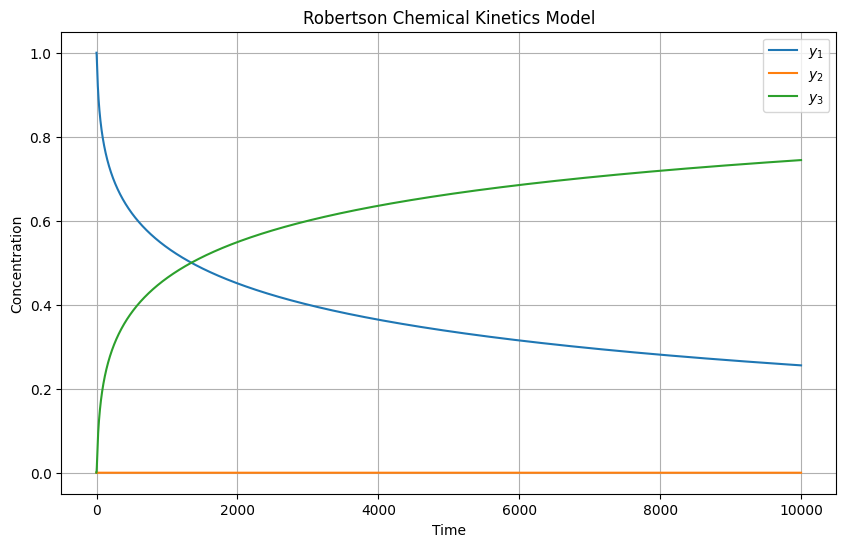

In [ ]:
y0 = np.array([1.0, 0.0, 0.0])
T = 10000.0
M = 50000

model = RobertsonModel(T, M, y0)
model.solve()
model.plot()